## AUTHOR : BEN MADANI YAZID
### Using Logistic Regression to pedict Fake bills

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
%run My_function.ipynb

# import data

In [8]:
data = pd.read_csv("../data/fake_bills.csv",sep=",")

## Exploration

In [9]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


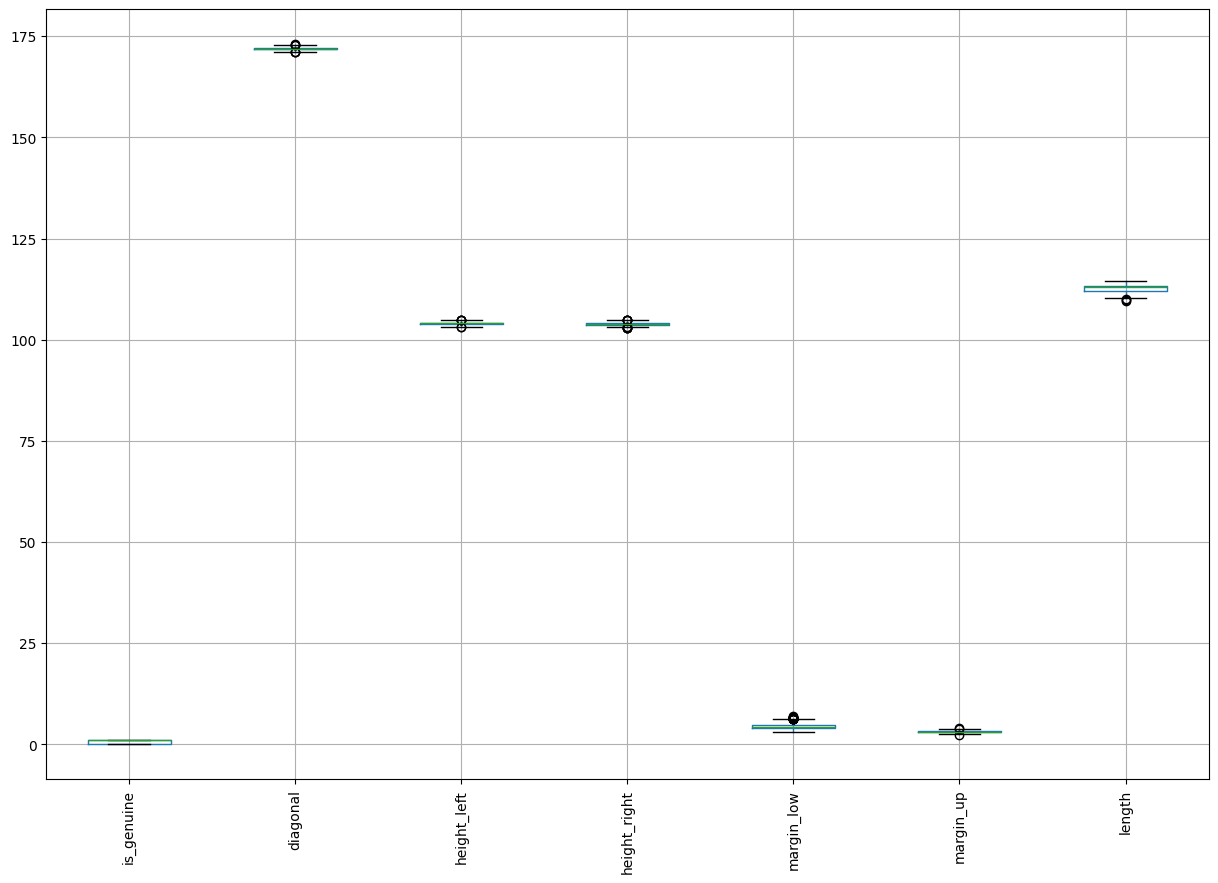

In [10]:
my_boxplots(data)

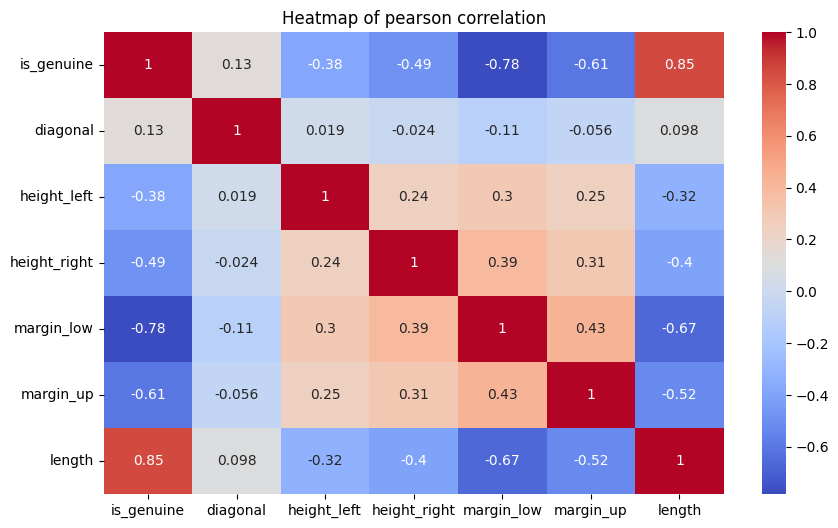

In [11]:
my_corr_heatmap(data)

# cleaning data

In [12]:
# chnage bool to 1,0
data["is_genuine"].replace([True, False], [1,0], inplace=True)

### Régression Linéaire

In [13]:

from sklearn.linear_model import LinearRegression

# StatModel
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

In [14]:
data_vide = data.loc[data["margin_low"].isna()]
data_non_vide = data.dropna()

In [15]:
# use back_ward function to select most pertinent features
columns = ['margin_low','diagonal','is_genuine','height_left','height_right','margin_up','length']
reg_backward = my_backward_selected(data_non_vide[columns], 'margin_low')

_______________________________
margin_low ~ height_left + diagonal + height_right + is_genuine + length + margin_up + 1
remove length (p-value : 0.868 )

_______________________________
margin_low ~ height_left + diagonal + height_right + is_genuine + margin_up + 1
remove diagonal (p-value : 0.719 )

_______________________________
margin_low ~ height_left + height_right + is_genuine + margin_up + 1
remove height_right (p-value : 0.496 )

_______________________________
margin_low ~ height_left + is_genuine + margin_up + 1
remove height_left (p-value : 0.454 )

_______________________________
margin_low ~ is_genuine + margin_up + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                

the  descriptive variables is : 
- is_genuine
- margin_up

In [16]:
# define X et y
X = data_non_vide.drop(['margin_low','diagonal','height_left','height_right','length'], axis=1)
X = sm.add_constant(X, has_constant='add')
y = data_non_vide["margin_low"].values.reshape(len(data_non_vide),1)

In [17]:
X

,const,is_genuine,margin_up
0,1.0,1,2.89
1,1.0,1,2.99
2,1.0,1,2.94
3,1.0,1,3.01
4,1.0,1,3.48
...,...,...,...
1495,1.0,0,3.09
1496,1.0,0,3.37
1497,1.0,0,3.36
1498,1.0,0,3.46


In [18]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
model_01 = sm.OLS(y_train, X_train)
resultat = model_01.fit()

y_pred = resultat.predict(X_train)

print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     942.0
Date:                Sun, 12 May 2024   Prob (F-statistic):          2.89e-244
Time:                        22:11:54   Log-Likelihood:                -606.17
No. Observations:                1170   AIC:                             1218.
Df Residuals:                    1167   BIC:                             1234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6622      0.220     25.769      0.0

### Vérification des hypothèses

Avant de valider l'utilisation de la régression linéaire, nous devons vérifier plusieurs hypothèses afin de s'assurer que nous pouvons appliquer cette régression. Voici les hypothèses à vérifier : 
- <b>Normalité</b> : Les erreurs résiduelles doivent être distribuées normalement. Cela signifie que les résidus doivent suivre une distribution normale avec une moyenne de zéro.
- <b>Homoscédasticité</b> : L'homoscédasticité signifie que la variance des erreurs résiduelles est constante à tous les niveaux de la variable prédite.
- <b>Multicolinéarité</b> : Cette hypothèse concerne la relation entre les variables prédictives (ou indépendantes) dans notre modèle de régression. Elle stipule qu'il ne devrait pas y avoir de forte corrélation linéaire entre les variables indépendantes. 

--------

#### Hypothèse de la normalité des résidus 

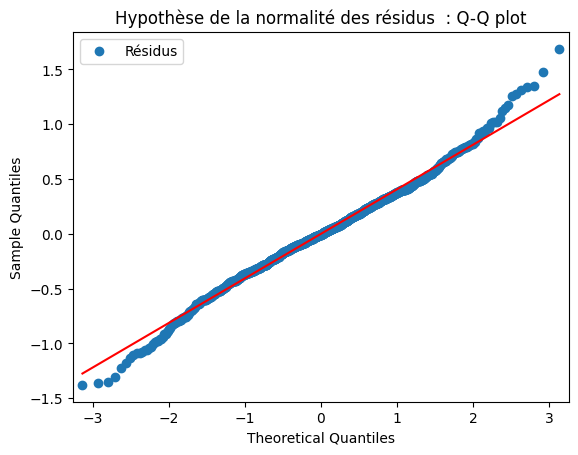

In [20]:
# Calcul des résidus
residuals = resultat.resid


sm.qqplot(residuals, line='s', label="Résidus")
plt.title("Hypothèse de la normalité des résidus  : Q-Q plot")
plt.legend()
plt.show()

<b>Test de Shapiro-Wilk</b>

In [21]:
from scipy.stats import shapiro

statistic, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Les résidus semblent suivre une distribution normale (hypothèse non rejetée).")
    print("P-value :",p_value)
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")
    print("P-value :",p_value)


Les résidus ne suivent pas une distribution normale (hypothèse rejetée).
P-value : 7.616344280536848e-06


C:\Users\yazid\AppData\Local\Temp\ipykernel_10940\897792914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


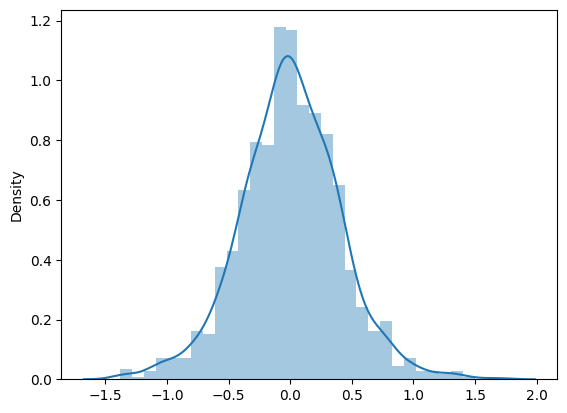

In [22]:
sns.distplot(residuals)
plt.show()

--------

In [23]:
import numpy as np
from scipy.stats import levene

residuals = resultat.resid
predicted = resultat.fittedvalues

groups = pd.qcut(predicted, q=5, labels=False)

levene_test = levene(*[residuals[groups == i] for i in np.unique(groups)], center='mean')

test_statistic = levene_test.statistic
p_value = levene_test.pvalue

print("leven test:")
print("statistic test:", test_statistic)
print("p value:", p_value)


leven test:
statistic test: 29.983642592506705
p value: 9.014373222445792e-24


--------

#### Hypothesis de Multicolinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#  calcule VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# On affiche les résultats
print("Variance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
     Variable         VIF
0       const  341.438603
1  is_genuine    1.617936
2   margin_up    1.617936


--------

In [25]:

X = data_vide.drop(["margin_low","height_right","length","diagonal","height_left"], axis=1)
X = sm.add_constant(X)
y = data_vide["margin_low"].values.reshape(len(data_vide),1)

In [26]:
prediction = resultat.predict(X)

In [27]:
new_data = data_vide.assign(margin_low=prediction)
new_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,4.090322,3.25,112.79
99,1,171.93,104.07,104.18,4.105030,3.14,113.08
151,1,172.07,103.80,104.38,4.121075,3.02,112.93
197,1,171.45,103.66,103.80,4.040850,3.62,113.27
241,1,171.83,104.14,104.06,4.121075,3.02,112.36


In [28]:

data = pd.concat([data_non_vide, new_data], ignore_index=True)


# Bills Predection

In [29]:
# we use  fonction my_backward_selected_logistic to find best features
columns = ['margin_low','diagonal','is_genuine','height_left','height_right','margin_up','length']
reg_backward = my_backward_selected_logistic(data_non_vide[columns], 'is_genuine')

_______________________________
is_genuine ~ margin_low + height_left + diagonal + height_right + length + margin_up + 1
Optimization terminated successfully.
         Current function value: 0.026765
         Iterations 12
remove diagonal (p-value: 0.728 )

_______________________________
is_genuine ~ margin_low + height_left + height_right + length + margin_up + 1
Optimization terminated successfully.
         Current function value: 0.026807
         Iterations 13
remove height_left (p-value: 0.294 )

_______________________________
is_genuine ~ margin_low + height_right + length + margin_up + 1
Optimization terminated successfully.
         Current function value: 0.027189
         Iterations 13
is the final model!

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1463
Model:                          Logit   Df Residuals:                     1458
Method:                          



 R-Square = 0,9574 

In [30]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
X = data.drop(["is_genuine","diagonal","height_left"], axis=1)
y = data["is_genuine"]

In [32]:
X_train ,X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [33]:
model_LR = LogisticRegression()

model_LR = model_LR.fit(X_train, y_train)

y_pred = model_LR.predict(X_test)

score_f1 = f1_score(y_test, y_pred)
score_f1 = round(score_f1*100,4)
print("The score of the model for test data is :", score_f1,"%")

The score of the model for test data is : 98.995 %


### Matrice de confusion

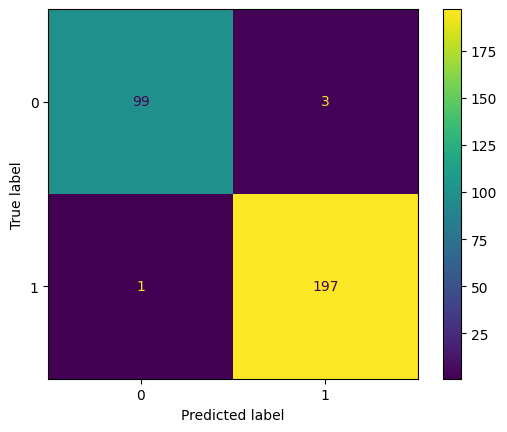

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [36]:
# save model
import joblib
joblib.dump(model_LR, '../model/modele_RL.joblib')

['../model/modele_RL.joblib']